<a href="https://colab.research.google.com/github/arifroska/PrakAPM/blob/main/K_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#import data
from google.colab import files
uploaded = files.upload()

Saving survey lung cancer.csv to survey lung cancer.csv


In [21]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd 

In [22]:
import io
data = pd.read_csv(io.BytesIO(uploaded['survey lung cancer.csv']))

feature_cols = ['AGE', 'SMOKING', 'ANXIETY', 'ALCOHOL CONSUMING','COUGHING']
X = data[feature_cols].values
y = data['LUNG_CANCER'].values

In [23]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [24]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [25]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train) 

KNeighborsClassifier()

In [26]:
y_pred = classifier.predict(X_test) 

In [27]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[ 2  5]
 [ 0 55]]
              precision    recall  f1-score   support

          NO       1.00      0.29      0.44         7
         YES       0.92      1.00      0.96        55

    accuracy                           0.92        62
   macro avg       0.96      0.64      0.70        62
weighted avg       0.93      0.92      0.90        62



In [28]:
error = []

#menghitung error K dari 1 sampai 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error rata-rata')

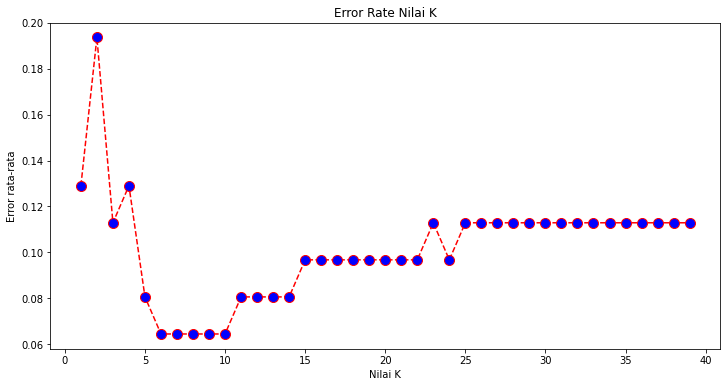

In [29]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate Nilai K')  
plt.xlabel('Nilai K')  
plt.ylabel('Error rata-rata') 